# Análisis Exploratorio de Datos (EDA) - Árbol de Decisión

En este análisis, se ha utilizado un modelo de Árbol de Decisión para predecir si un cliente aceptó o no la última campaña de marketing, basándose en variables relacionadas con las campañas anteriores y características demográficas del cliente. A continuación, se presenta un análisis del modelo, sus métricas de rendimiento y algunas visualizaciones clave.

## Carga y Preparación de los Datos

El conjunto de datos se carga desde un archivo CSV llamado `marketing_campaign_corrected.csv`. Se realizan los siguientes pasos iniciales:

### Creación de la columna `Response`

Se genera una nueva columna denominada `Response`, que es igual a la columna `AcceptedCmp5` (la columna que indica si el cliente aceptó la última campaña).

### Eliminación de Columnas Innecesarias

Existe la posibilidad de eliminar las campañas para predecir solo con los datos del resto de caracteristicas, esto produce que el modelo no use como indicador si el cliente acepto estas campañas, dando un Acuracy de 0.953 pero siendo mucho menos realista:

   Se eliminan las columnas `ID` y las columnas relacionadas con las campañas previas (`AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`), dejando solo las características relevantes para la predicción.

### Codificación de Variables Categóricas

Las variables categóricas (`Education`, `Marital_Status`, `Dt_Customer`) se transforman en valores numéricos utilizando el `LabelEncoder` para que puedan ser utilizadas en el modelo de Árbol de Decisión.

## Modelado

Se crea un modelo de Árbol de Decisión utilizando las variables predictoras. El objetivo del modelo es predecir la columna `Response`:

- **Variable objetivo (y):** `Response` (1 si el cliente aceptó la última campaña, 0 si no la aceptó).
- **Variables predictoras (X):** Incluyen diversas características del cliente, como información demográfica y resultados de campañas anteriores (con excepción de las columnas relacionadas con la última campaña).

### División de los Datos

El conjunto de datos se divide en conjuntos de entrenamiento y prueba (80% para entrenamiento y 20% para prueba) para evaluar el rendimiento del modelo.

### Entrenamiento del Modelo

El modelo de Árbol de Decisión se entrena con un límite de profundidad de 6 para evitar el sobreajuste y hacer que el modelo sea más interpretable.

## Evaluación del Modelo

El rendimiento del modelo se evalúa mediante las siguientes métricas:

- **Exactitud (Accuracy):** 0.883
- **Matriz de Confusión:** La matriz muestra el número de predicciones correctas e incorrectas para cada clase (Aceptó/No Aceptó).
- **Informe de Clasificación:** Un análisis detallado que incluye métricas como precisión, recall y f1-score para cada clase.

Accuracy: 0.883 (0.953 eliminando variables de campañas anteriores)
 
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       382
           1       0.65      0.35      0.46        62

    accuracy                           0.88       444
    macro avg       0.77      0.66      0.70       444
    weighted avg       0.87      0.88      0.87       444

Accuracy: 0.883
Confusion Matrix:
[[370  12]
 [ 40  22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       382
           1       0.65      0.35      0.46        62

    accuracy                           0.88       444
   macro avg       0.77      0.66      0.70       444
weighted avg       0.87      0.88      0.87       444

F1 Score: 0.458


/var/folders/by/_c0phsdn6xl_85fftg8cd8480000gn/T/ipykernel_34211/3005381642.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Característica', data=feature_importances, palette='viridis')


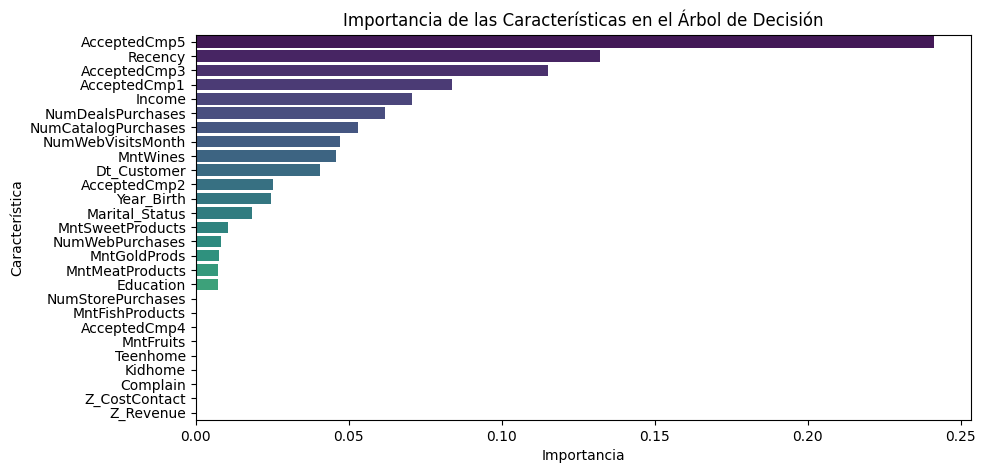

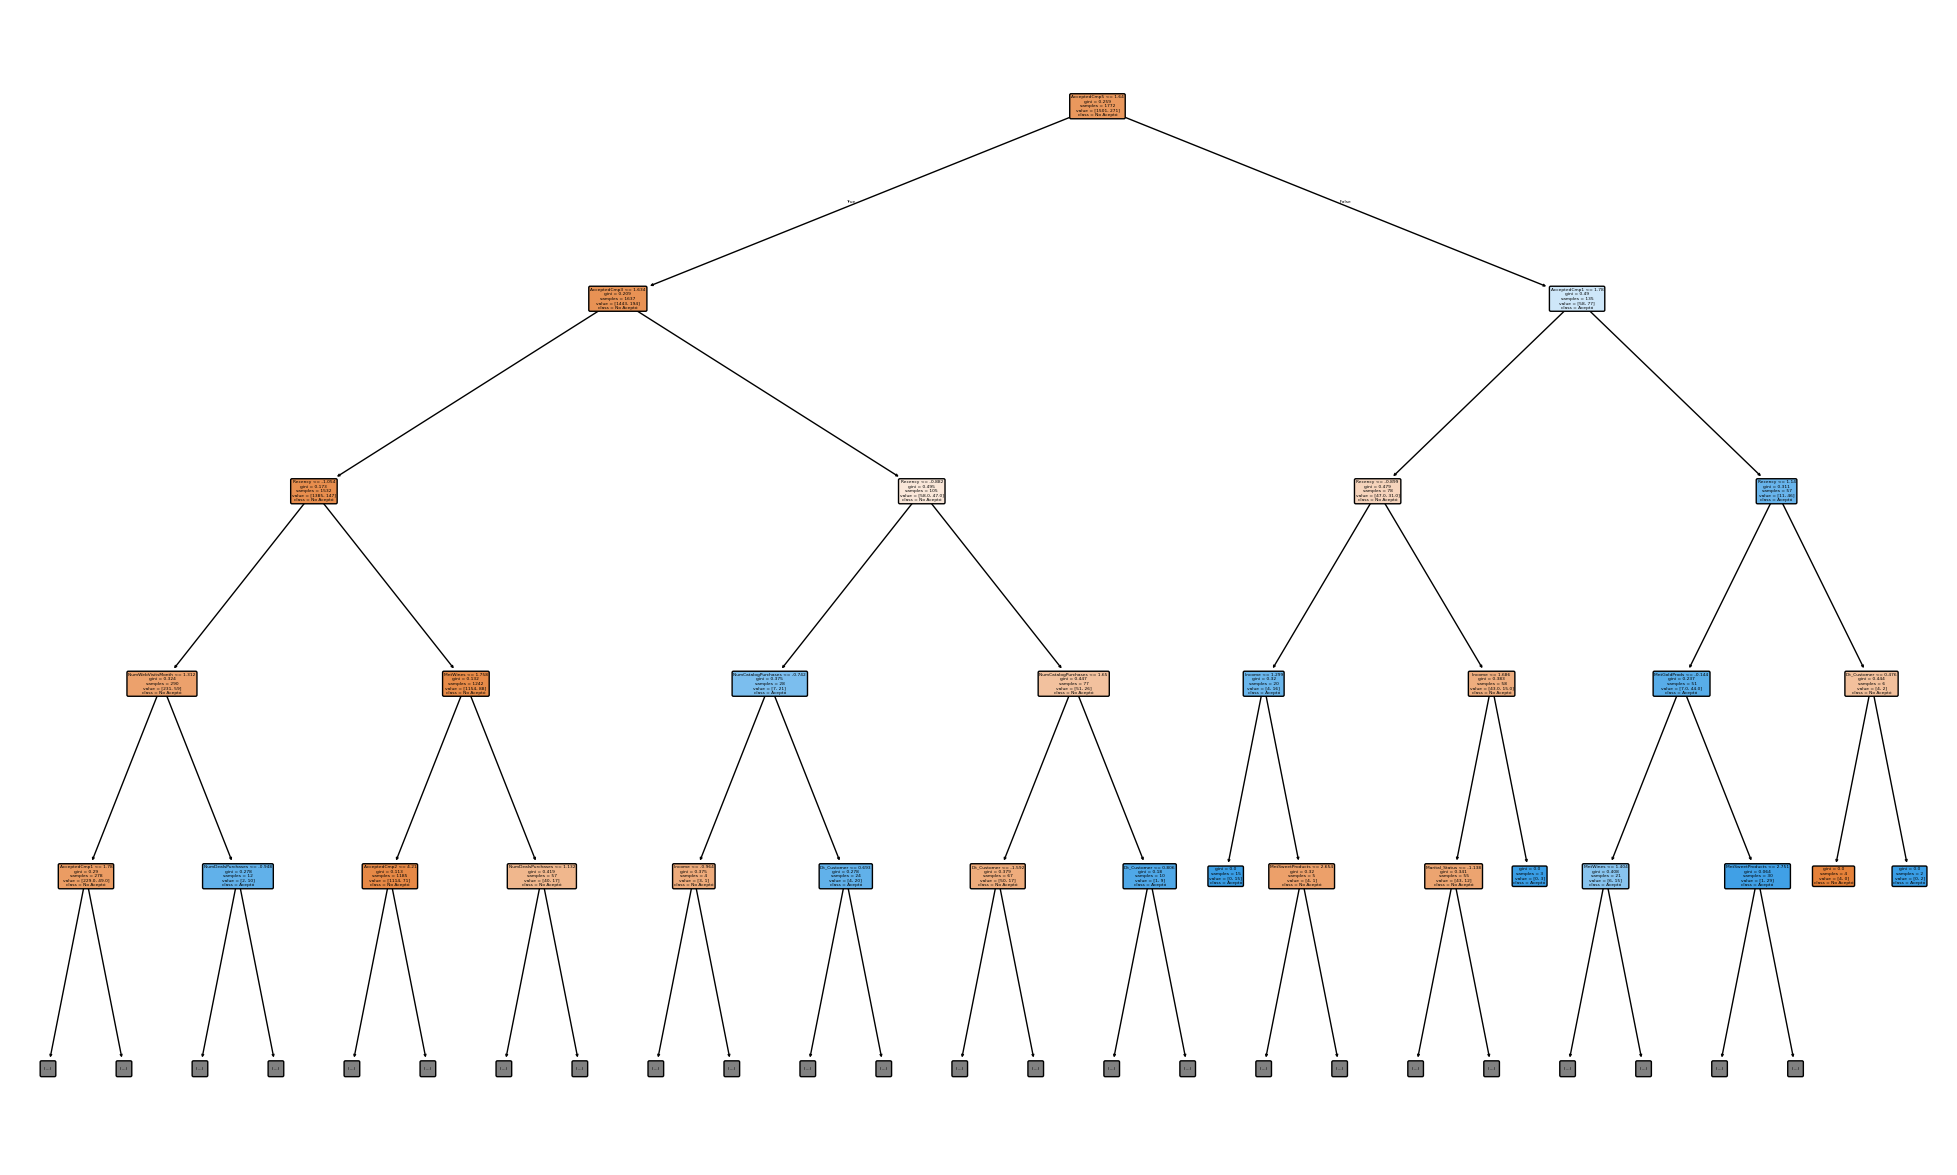

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Cargar el dataset corregido
df = pd.read_csv("marketing_campaign_corrected.csv")

# Eliminar valores nulos
df = df.dropna()

# Eliminar espacios en los nombres de columnas
df.columns = df.columns.str.strip()

# Eliminar las columnas 'ID' y las relacionadas con las campañas aceptadas, excepto la columna 'Response'
# cols_to_drop = ['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cols_to_drop = ['ID']
df = df.drop(columns=cols_to_drop)

# Codificación de variables categóricas
categorical_cols = ['Education', 'Marital_Status', 'Dt_Customer']
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Definir las variables predictoras y la variable objetivo
X = df.drop(columns=['Response'])
y = df['Response']

# Normalización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_model.fit(X_train, y_train)

# Predicción
y_pred = tree_model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.3f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Visualización de Importancia de Características
feature_importances = pd.DataFrame({'Característica': X.columns, 'Importancia': tree_model.feature_importances_})
feature_importances = feature_importances.sort_values('Importancia', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importancia', y='Característica', data=feature_importances, palette='viridis')
plt.title('Importancia de las Características en el Árbol de Decisión')
plt.show()

# Visualizar árbol
plt.figure(figsize=(25, 15))
plot_tree(
    tree_model,
    filled=True,
    feature_names=X.columns,
    class_names=['No Aceptó', 'Aceptó'],
    rounded=True,
    max_depth=4
)
plt.show()



### Explicación del Análisis:

- **Precisión (Accuracy):** El modelo ha alcanzado una precisión del 88.3%, lo que indica que el modelo predice correctamente si un cliente aceptó o no la última campaña en el 88.3% de los casos.
  
- **Matriz de Confusión:** La matriz muestra que el modelo tiene un buen desempeño en la predicción de clientes que no aceptaron la campaña (clase 0), pero presenta un rendimiento algo menor en la clase 1 (clientes que aceptaron la campaña). Esto puede ser indicativo de un ligero sesgo hacia la predicción de clientes que no aceptaron la campaña.

- **Informe de Clasificación:** Este informe ofrece detalles más profundos sobre el rendimiento del modelo en cada clase (aceptó/no aceptó), con métricas como precisión, recall y f1-score.

- **Importancia de las características:** Las variables que describen el comportamiento de los clientes en campañas anteriores (`AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, etc.) son probablemente muy relevantes para la predicción de la variable `Response`.

- **Visualizaciones:** Se incluye la visualización del árbol de decisión, que muestra cómo se divide el conjunto de datos y qué características influyen en la toma de decisiones del modelo.